In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_df = pd.read_csv("c:/users/geoff/downloads/city_data.csv")
#city_data_df.head()

ride_data_df = pd.read_csv("c:/users/geoff/downloads/ride_data.csv")
ride_data_df.head()
# Read the City and Ride Data

# Combine the data into a single dataset
combined_data_df=pd.merge(city_data_df, ride_data_df, on="city")
# Display the data table for preview
combined_data_df.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [2]:
combined_data_df.dtypes

city             object
driver_count      int64
type             object
date             object
fare            float64
ride_id           int64
dtype: object

## Bubble Plot of Ride Sharing Data

In [3]:
#Urban, suburban, and rural cities
urban_cities = combined_data_df[combined_data_df['type']=='Urban']
suburban_cities = combined_data_df[combined_data_df['type']=='Suburban'] 
rural_cities = combined_data_df[combined_data_df['type']=='Rural']
rural_cities.head()

,city,driver_count,type,date,fare,ride_id
2250,South Jennifer,7,Rural,2018-04-01 09:32:45,21.63,9135979586871
2251,South Jennifer,7,Rural,2018-03-07 19:10:13,48.79,9730627367446
2252,South Jennifer,7,Rural,2018-04-05 14:35:42,32.20,683983658392
2253,South Jennifer,7,Rural,2018-04-02 10:26:50,14.11,3828267773041
2254,South Jennifer,7,Rural,2018-04-10 20:46:11,43.25,623928772332


In [4]:
#urban, suburban, and rural driver counts per city
urban_driver_count = urban_cities.groupby('city')['driver_count'].mean()
suburban_driver_count = suburban_cities.groupby('city')['driver_count'].mean()
rural_driver_count = rural_cities.groupby('city')['driver_count'].mean()
rural_driver_count.head()

city
Bradshawfurt      7
Garzaport         7
Harringtonfort    4
Jessicaport       1
Lake Jamie        4
Name: driver_count, dtype: int64

In [5]:
#urban, suburban, and rural ride count per city
urban_rides = urban_cities.groupby('city')['ride_id'].count()
suburban_rides = suburban_cities.groupby('city')['ride_id'].count()
rural_rides = rural_cities.groupby('city')['ride_id'].count()
rural_rides.head()

city
Bradshawfurt      10
Garzaport          3
Harringtonfort     6
Jessicaport        6
Lake Jamie         6
Name: ride_id, dtype: int64

In [6]:
#Urban, suburban, and rural average fares per city
urban_avgfare = urban_cities.groupby('city')['fare'].mean()
suburban_avgfare = suburban_cities.groupby('city')['fare'].mean()
rural_avgfare = rural_cities.groupby('city')['fare'].mean()
rural_avgfare.head()

city
Bradshawfurt      40.064000
Garzaport         24.123333
Harringtonfort    33.470000
Jessicaport       36.013333
Lake Jamie        34.358333
Name: fare, dtype: float64

In [7]:
# Create scatter plot dataframe to generate plots
urban_scatter_df = pd.DataFrame({"Rides": urban_rides, "Fares": urban_avgfare, "Drivers": urban_driver_count})
urban_scatter_df.head()
urban_scatter_df.dtypes

Rides        int64
Fares      float64
Drivers      int64
dtype: object

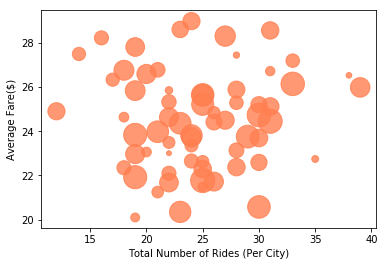

In [8]:
#Urban scatter plot
plt.scatter(urban_rides, urban_avgfare, s=8*urban_driver_count, c = 'coral',
           alpha = 0.8, label = "Urban")
#urban_plot = urban_scatter_df.plot(kind ='scatter', x = 'Rides', y ='Fares',
 #                       s=urban_scatter_df['Drivers'].values, alpha=0.5, c = 'coral')
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare($)")
plt.show()

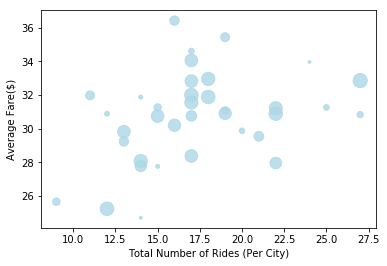

In [9]:
#Suburban scatter plot
plt.scatter(suburban_rides, suburban_avgfare, s=8*suburban_driver_count, c = 'lightblue',
           alpha = 0.8, label = "Suburban")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare($)")
plt.show()

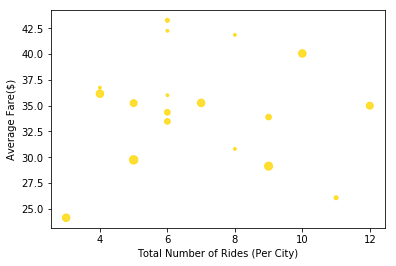

In [10]:
#Rural scatter plot
plt.scatter(rural_rides, rural_avgfare, s=8*rural_driver_count, c = 'gold',
           alpha = 0.8, label = "Rural")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare($)")
plt.show()

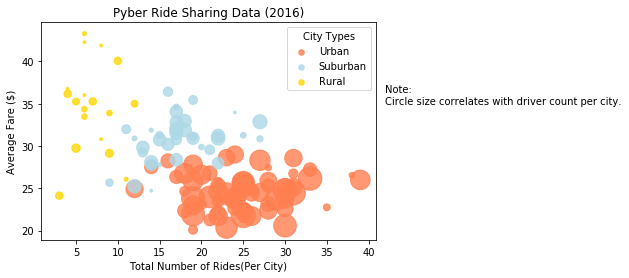

In [19]:
#Merge Urban, Suburban, and Rural scatter plots into one
#Include a single legend, title and text note
plt.scatter(urban_rides, urban_avgfare, s=8*urban_driver_count, c = 'coral',
           alpha = 0.8, label = "Urban")
plt.scatter(suburban_rides, suburban_avgfare, s=8*suburban_driver_count, c = 'lightblue',
           alpha = 0.8, label = "Suburban")
plt.scatter(rural_rides, rural_avgfare, s=8*rural_driver_count, c = 'gold',
           alpha = 0.8, label = "Rural")
lgend=plt.legend(loc = 'upper right', title = "City Types")
lgend.legendHandles[0]._sizes = [30] #this will set the markersize in the legend to be the same for each type
lgend.legendHandles[1]._sizes = [30]
lgend.legendHandles[2]._sizes = [30]

#plt.legend(loc = 'upper right', title = "City Types", markerscale=5*0.125)
plt.text(x=42, y=35, s= "Note:\nCircle size correlates with driver count per city.")
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides(Per City)")
plt.ylabel("Average Fare ($)")
plt.show()

In [12]:
# Obtain the x and y coordinates for each of the three city types...group by type
#city_ride_count_df = combined_data_df.groupby('city')["driver_count"].count()
#city_ride_count_df
  
    #avgfare_df = combined_data_df.groupby('city')["fare"].mean()
    #avgfare_df

#Utilize the groupby function to generate the df and columns I need for my scatter plot
scatter_plot_df = pd.DataFrame(combined_data_df.groupby(['city', 'driver_count','type'])["fare"].agg(['mean', 'count']))
scatter_plot_df.head()
#scatter_plot_df['size']=scatter_plot_df.pd.pivot_table(combined_data_df, index=['city', 'type'], values = 'driver_count')
#scatter_plot_df['size'] = pd.pivot_table(combined_data_df, values = 'driver_count', index=['city', 'type']
#g['size'] = df.groupby('c')['type'].transform('size')
#pd.pivot_table(df, values = 'Value', index=['Country','Year']


,,,mean,count
city,driver_count,type,,
Amandaburgh,12,Urban,24.641667,18
Barajasview,26,Urban,25.332273,22
Barronchester,11,Suburban,36.422500,16
Bethanyland,22,Suburban,32.956111,18
Bradshawfurt,7,Rural,40.064000,10


In [13]:
#This was an unsuccessful attempt to do the scatterplots
#groups = scatter_plot_df.groupby('type')
#colors = ['red','gold','lightblue']
#fig, ax = plt.subplots()
#for name, group in groups:
    #scatter_plot_df.plot(kind='scatter', x='count', y='mean', s=5, color='b', alpha=0.5, subplots=True)
    #plt.scatter(scatter_plot_df.count, scatter_plot_df.mean, s=city_data_df.driver_count)
    
    #ax.plot(group['count'], group['mean'], marker='o', linestyle='', ms=12, label=name,
          #markeredgecolor='black', alpha = 0.5)
#ax.legend(title="City Types")
#plt.legend(loc = 'upper right')
#plt.xlabel("Total Number of Rides(Per City)")
#plt.ylabel("Average Fare ($)")
#plt.show()
# Build the scatter plots for each city types


# Incorporate the other graph properties

# Create a legend

# Incorporate a text label regarding circle size

# Save Figure


## Total Fares by City Type

In [14]:
# Calculate Type Percents
total_fares_type_df=combined_data_df.groupby('type')['fare'].sum()
total_fares_type_df


type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

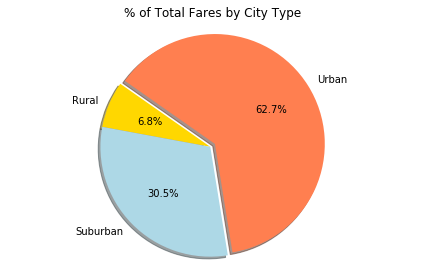

In [15]:
fares = [4327.93, 19356.33, 39854.38]
# Build Pie Chart
labels = ['Rural', 'Suburban', 'Urban']
colors = ['gold','lightblue','coral']
plt.title('% of Total Fares by City Type')
plt.pie(fares, labels = labels, autopct = '%1.1f%%', explode = (0,0,0.05), colors=colors,
        shadow = True, startangle = 145)
plt.axis('equal')
plt.tight_layout()
plt.show()

# Save Figure

## Total Rides by City Type

In [16]:
# Calculate Ride Percents
total_rides_type_df=combined_data_df.groupby('type')['ride_id'].count()
total_rides_type_df


type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

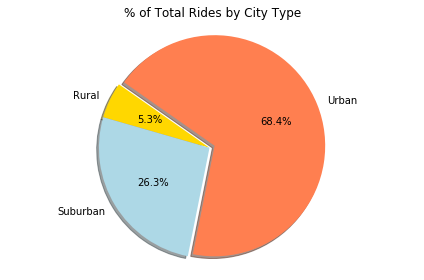

In [17]:
# Build Pie Chart
rides=[125, 625, 1625]
labels = ['Rural', 'Suburban', 'Urban']
colors = ['gold','lightblue','coral']
plt.title('% of Total Rides by City Type')
plt.pie(rides, labels = labels, autopct = '%1.1f%%', explode = (0,0,0.05), colors=colors,
        shadow = True, startangle = 145)
plt.axis('equal')
plt.tight_layout()
plt.show()
# Save Figure
# Show Figure

## Total Drivers by City Type

In [18]:
# Calculate Driver Percents
total_drivers_type_df=combined_data_df.groupby('type')['driver_count'].sum()
total_drivers_type_df


type
Rural         537
Suburban     8570
Urban       59602
Name: driver_count, dtype: int64

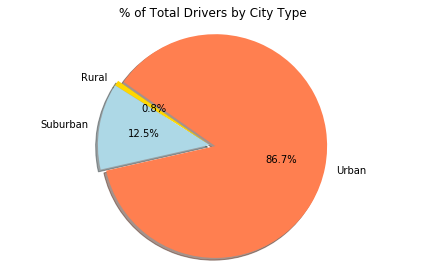

In [56]:
# Build Pie Charts
drivers=[537, 8570, 59602]
labels = ['Rural', 'Suburban', 'Urban']
colors = ['gold','lightblue','coral']
plt.title('% of Total Drivers by City Type')
plt.pie(drivers, labels = labels, autopct = '%1.1f%%', explode = (0,0,0.05), colors=colors,
        shadow = True, startangle = 145)
plt.axis('equal')
plt.tight_layout()
plt.show()
# Save Figure

# Show Figure
plt.show()

## Observations

In [ ]:
#The more dense the city population the greater the number of drivers needed and total rides.
#The average fare may be greater in rural cities due to lower total number of rides, but over longer distances.
#The urban and suburban city types are not surprisingly the stronger adopters of this ride model. 